# <b>作業要求</b>

### 1. 使用Python建立ARIMA模型，預測股票價格，並進行可視化。
### 2. 使用Python設計一個量化交易策略，並使用歷史資料進行回測。
回測。

# <b>取得股價資料</b>

In [53]:
!pip install yfinance

In [54]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [55]:
# 輸入股票代號
#stock_id = "8299.TWO"
stock_id = "2330.TW"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 1, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2023-07-20 00:00:00+00:00,565.416809,579.0,584.0,578.0,580.0,15108109
1,2023-07-21 00:00:00+00:00,546.862549,560.0,563.0,557.0,560.0,46711021
2,2023-07-24 00:00:00+00:00,544.909485,558.0,563.0,557.0,557.0,25268835
3,2023-07-25 00:00:00+00:00,555.651367,569.0,569.0,561.0,561.0,19590349
4,2023-07-26 00:00:00+00:00,552.721741,566.0,571.0,563.0,569.0,13314305
...,...,...,...,...,...,...,...
118,2024-01-09 00:00:00+00:00,578.451050,586.0,589.0,583.0,588.0,22501510
119,2024-01-10 00:00:00+00:00,576.476929,584.0,586.0,580.0,581.0,13037716
120,2024-01-11 00:00:00+00:00,578.451050,586.0,589.0,583.0,586.0,23997409


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（EMA）

In [56]:
# 計算3日 EMA
df['3_EMA'] = df['Close'].ewm(span=3, adjust=False).mean()

# 計算6日 EMA
df['6_EMA'] = df['Close'].ewm(span=6, adjust=False).mean()

# 計算9日 EMA
df['9_EMA'] = df['Close'].ewm(span=9, adjust=False).mean()

# 列印最後筆數
df.tail()


Price,Date,Adj Close,Close,High,Low,Open,Volume,3_EMA,6_EMA,9_EMA
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,,,
118,2024-01-09 00:00:00+00:00,578.451050,586.0,589.0,583.0,588.0,22501510,583.57344,583.490588,583.723502
119,2024-01-10 00:00:00+00:00,576.476929,584.0,586.0,580.0,581.0,13037716,583.78672,583.636134,583.778801
120,2024-01-11 00:00:00+00:00,578.451050,586.0,589.0,583.0,586.0,23997409,584.89336,584.311524,584.223041
121,2024-01-12 00:00:00+00:00,576.476929,584.0,588.0,581.0,581.0,16496053,584.44668,584.222517,584.178433
122,2024-01-15 00:00:00+00:00,578.451050,586.0,590.0,585.0,590.0,21143076,585.22334,584.730370,584.542746


# <b>資料可視化</b>
K 線型態的捕捉

## 可視化收盤價折線圖

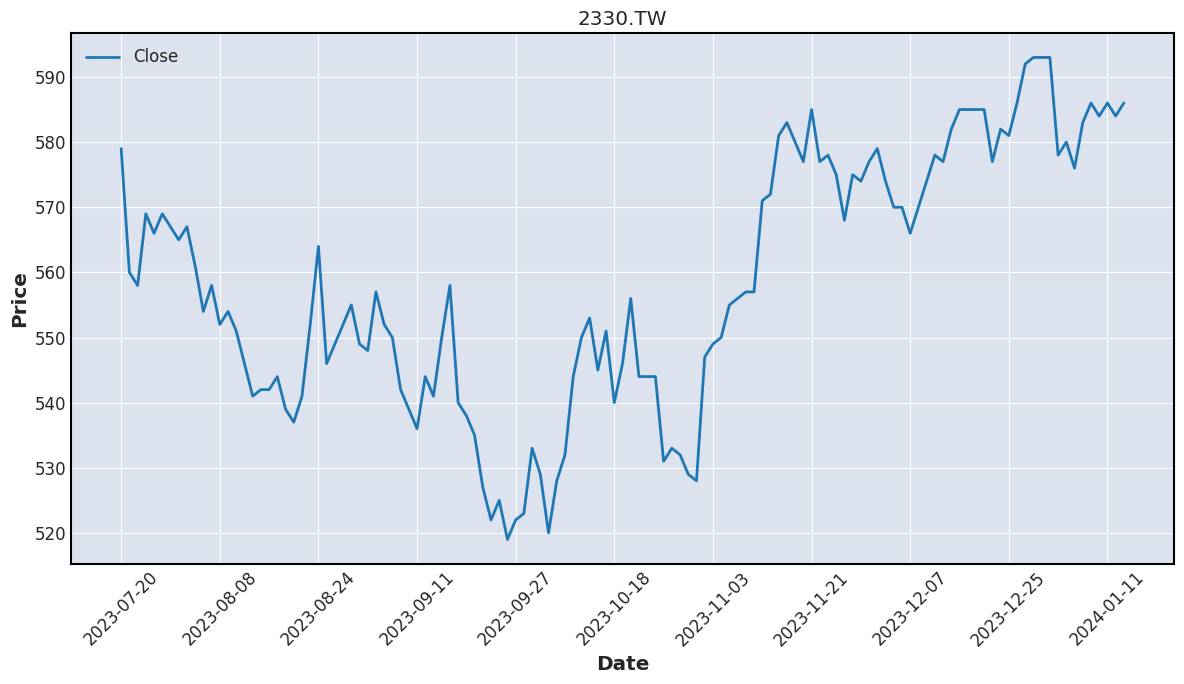

In [57]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 加入技術指標

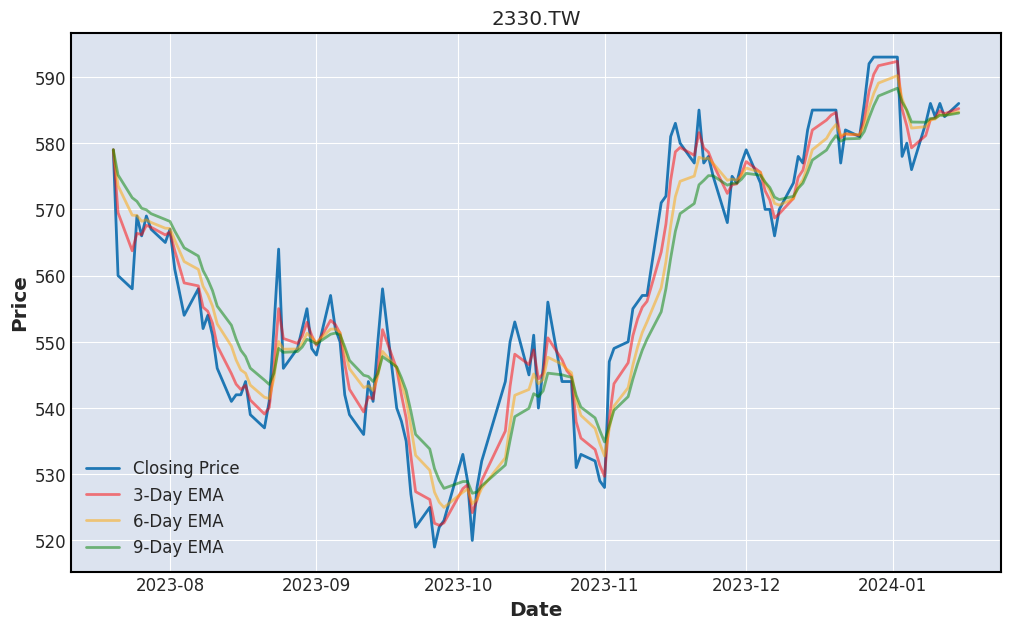

In [58]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 3 天的 EMA
plt.plot(df['Date'], df['3_EMA'], label='3-Day EMA', color='red', alpha=.5)

# 6 天的 EMA
plt.plot(df['Date'], df['6_EMA'], label='6-Day EMA', color='orange', alpha=.5)

# 9 天的 EMA
plt.plot(df['Date'], df['9_EMA'], label='9-Day EMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [59]:
!pip install mplfinance

In [60]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')

# 過濾掉非數字列
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
kplot_df = kplot_df[numeric_columns]

# 檢查並確保所有數據都是 float
kplot_df = kplot_df.astype(float)
kplot_df['2023-8-01':'2023-09-18'].tail()

Price,Open,High,Low,Close,Volume
Ticker,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
Date,,,,,
2023-09-12 00:00:00+00:00,536.0,545.0,536.0,544.0,16028336.0
2023-09-13 00:00:00+00:00,545.0,548.0,541.0,541.0,16191392.0
2023-09-14 00:00:00+00:00,544.0,550.0,543.0,550.0,17144287.0
2023-09-15 00:00:00+00:00,549.0,558.0,547.0,558.0,42517441.0
2023-09-18 00:00:00+00:00,548.0,549.0,540.0,540.0,36684692.0


In [61]:
kplot_df.fillna(0, inplace=True)  # 用 0 填補

In [62]:
kplot_df.columns
# 將 MultiIndex 轉換為單層索引
kplot_df.columns = kplot_df.columns.get_level_values(0)

# 檢查轉換後的欄位名稱
print(kplot_df.head())

Price                       Open   High    Low  Close      Volume
Date                                                             
2023-07-20 00:00:00+00:00  580.0  584.0  578.0  579.0  15108109.0
2023-07-21 00:00:00+00:00  560.0  563.0  557.0  560.0  46711021.0
2023-07-24 00:00:00+00:00  557.0  563.0  557.0  558.0  25268835.0
2023-07-25 00:00:00+00:00  561.0  569.0  561.0  569.0  19590349.0
2023-07-26 00:00:00+00:00  569.0  571.0  563.0  566.0  13314305.0


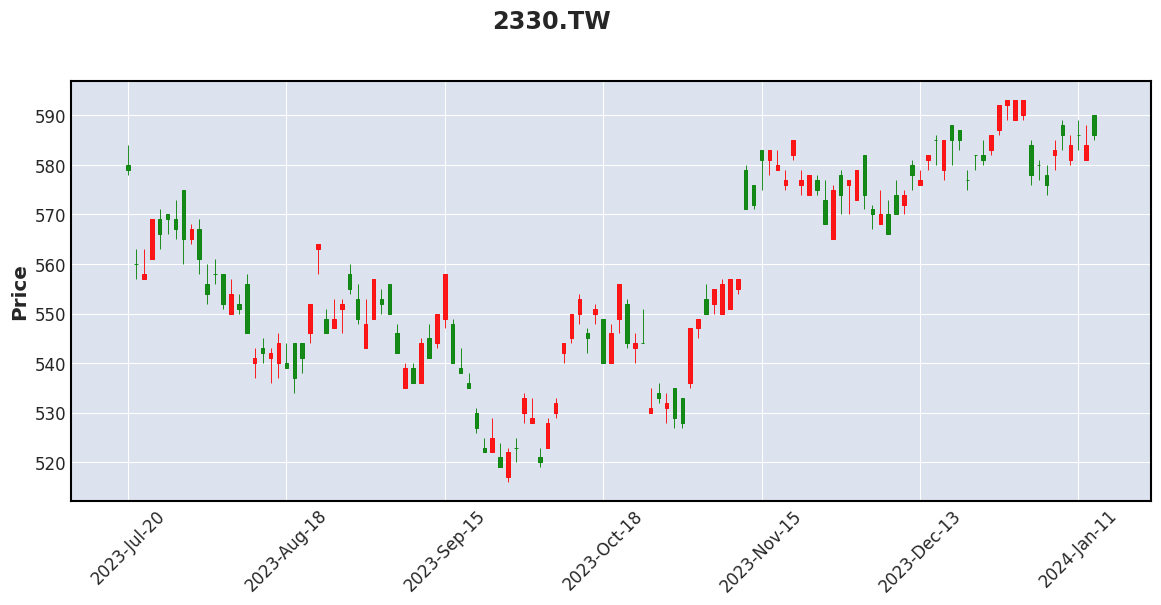

In [63]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 資料前處理

In [64]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能
from statsmodels.tsa.arima.model import ARIMA

In [65]:

# 使用特徵
close_prices= df['Close']

train_size=int(len(close_prices)*0.7)
train,test = close_prices[:train_size],close_prices[train_size:]


In [66]:
print(f"訓練集長度:{len(train)}")
print(f"訓練集長度:{len(test)}")

訓練集長度:86
訓練集長度:37


## 建立ARIMA

In [67]:
from statsmodels.tsa.stattools import adfuller

# adf平穩性檢定(p-value要<0.05)

In [68]:
result = adfuller(close_prices)
print(f"adf統計量:{result[0]}")
print(f"p-value:{result[1]}")


adf統計量:-1.6865869124134043
p-value:0.438036215891511


# 不平穩 做一階差分

In [69]:
data_diff =close_prices.diff().dropna()
# 再次進行 ADF 檢定
result = adfuller(data_diff)
print('ADF 統計量（差分後）：', result[0])
print('p-value（差分後）：', result[1])

ADF 統計量（差分後）： -12.523676498661917
p-value（差分後）： 2.5159554509034328e-23


# 設置最佳化參數

In [70]:
def optimize_arima(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_model = None
# 使用迴圈迭代 p, d, q 組合找出最佳參數
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    yhat = model_fit.forecast(steps=len(test))
                    error = mean_squared_error(test, yhat)
                    if error < best_score:
                        best_score, best_cfg = error, (p, d, q)
                        best_model = model_fit
                except:
                    continue
    return best_cfg, best_model

In [71]:
# 定義 p, d, q 參數範圍
p_values = range(0, 6) #範圍0~5
d_values = range(0, 3)#範圍0~2
q_values = range(0, 6) #範圍0~5
# 找出 ARIMA 模型最佳參數
best_cfg, best_model = optimize_arima(train, p_values,
d_values, q_values)
# 印出最佳参数
print(f'最佳參數 {best_cfg}')

/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: Conver

最佳參數 (4, 2, 3)


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [72]:
import math

# 跑ARIMA模型

In [73]:
# 預測
yhat = best_model.forecast(steps=len(test))
# 計算誤差RMSE
rmse_optimized = math.sqrt(mean_squared_error(test, yhat))
# 印出誤差RMSE
print(f"RMSE: {rmse_optimized}")


RMSE: 6.6763858556217075


# 測試AR模型

In [74]:
# AR1 模型
ar1_model = ARIMA(train, order=(1, 0, 0)).fit()
ar1_pred = ar1_model.forecast(steps=len(test))
ar1_rmse = np.sqrt(mean_squared_error(test, ar1_pred))
print(f"AR1 RMSE: {ar1_rmse}")
# AR2 模型
ar2_model = ARIMA(train, order=(2, 0, 0)).fit()
ar2_pred = ar2_model.forecast(steps=len(test))
ar2_rmse = np.sqrt(mean_squared_error(test, ar2_pred))
print(f"AR2 RMSE: {ar2_rmse}")
# AR3 模型
ar3_model = ARIMA(train, order=(3, 0, 0)).fit()
ar3_pred = ar3_model.forecast(steps=len(test))
ar3_rmse = np.sqrt(mean_squared_error(test, ar3_pred))
print(f"AR3 RMSE: {ar3_rmse}")


AR1 RMSE: 22.073619116966093
AR2 RMSE: 20.700247183037227
AR3 RMSE: 19.12604502133803


# 畫圖

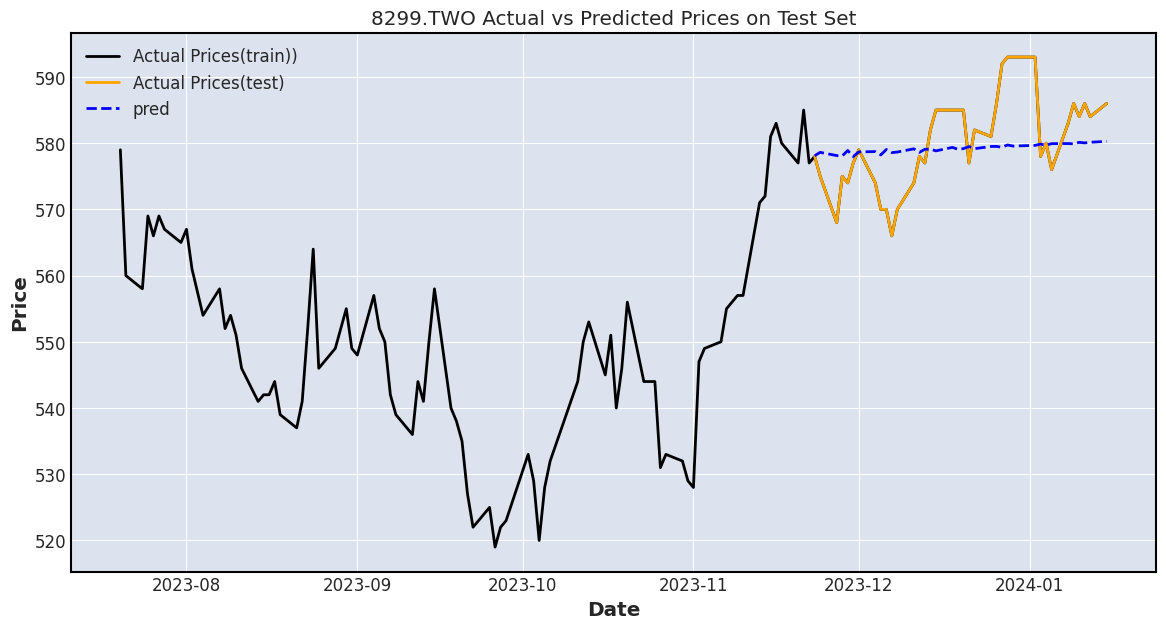

In [75]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices(train))', color='black', linewidth=2)
plt.plot(df['Date'][-len(yhat):], df['Close'][-len(yhat):], label='Actual Prices(test)', color='orange', linewidth=2)
plt.plot(df['Date'][-len(yhat):], yhat, label='pred', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 建立自己的量化策略

In [76]:
# 計算3日 EMA
df['30_EMA'] = df['Close'].ewm(span=30, adjust=False).mean()

# 計算6日 EMA
df['45_EMA'] = df['Close'].ewm(span=45, adjust=False).mean()

# 計算9日 EMA
df['60_EMA'] = df['Close'].ewm(span=60, adjust=False).mean()

# 列印最後筆數
df.tail()


Price,Date,Adj Close,Close,High,Low,Open,Volume,3_EMA,6_EMA,9_EMA,30_EMA,45_EMA,60_EMA
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,,,,,,
118,2024-01-09 00:00:00+00:00,578.451050,586.0,589.0,583.0,588.0,22501510,583.57344,583.490588,583.723502,579.535029,575.251871,571.887593
119,2024-01-10 00:00:00+00:00,576.476929,584.0,586.0,580.0,581.0,13037716,583.78672,583.636134,583.778801,579.823092,575.632225,572.284721
120,2024-01-11 00:00:00+00:00,578.451050,586.0,589.0,583.0,586.0,23997409,584.89336,584.311524,584.223041,580.221602,576.082997,572.734402
121,2024-01-12 00:00:00+00:00,576.476929,584.0,588.0,581.0,581.0,16496053,584.44668,584.222517,584.178433,580.465370,576.427215,573.103766
122,2024-01-15 00:00:00+00:00,578.451050,586.0,590.0,585.0,590.0,21143076,585.22334,584.730370,584.542746,580.822443,576.843423,573.526593


In [77]:
pip install  backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 7.8 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 重新用更多資料測試

In [81]:
'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 10, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=10000)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()
df.columns = df.columns.get_level_values(0)
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
0,2000-01-04 00:00:00+00:00,34.216949,69.649033,69.649033,68.475182,69.649033,200662336736
1,2000-01-05 00:00:00+00:00,34.985806,71.214043,71.214043,68.866341,69.649033,402466805912
2,2000-01-06 00:00:00+00:00,34.216949,69.649033,71.214043,69.649033,70.822884,197545715802
3,2000-01-07 00:00:00+00:00,33.255749,67.692490,68.475182,66.518639,67.301331,235270344752
4,2000-01-10 00:00:00+00:00,34.409122,70.040192,70.431351,68.475182,69.649033,276171685539
...,...,...,...,...,...,...,...
6168,2024-10-08 00:00:00+00:00,1010.000000,1010.000000,1010.000000,997.000000,1000.000000,30845902
6169,2024-10-09 00:00:00+00:00,1020.000000,1020.000000,1035.000000,1020.000000,1030.000000,46975717
6170,2024-10-11 00:00:00+00:00,1045.000000,1045.000000,1050.000000,1020.000000,1025.000000,43058754
6171,2024-10-14 00:00:00+00:00,1045.000000,1045.000000,1055.000000,1035.000000,1045.000000,36858874


In [82]:
import pandas as pd


df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True) 

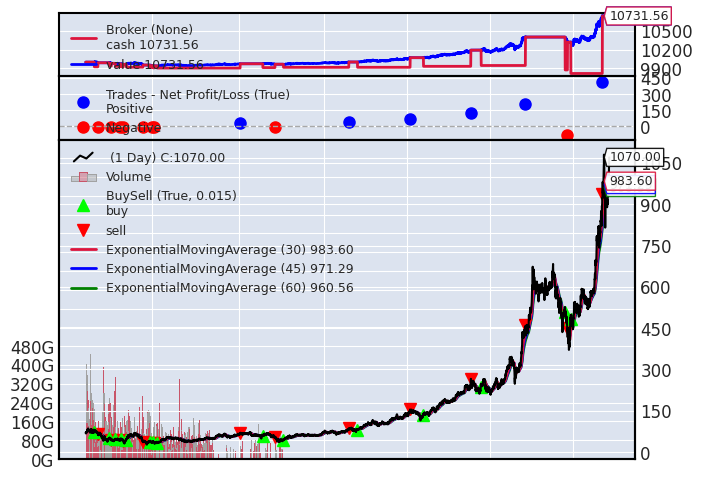

[[<Figure size 640x480 with 4 Axes>]]

In [83]:
import backtrader as bt
import pandas as pd
%matplotlib inline
# 創建策略
class EMAStrategy(bt.Strategy):
    def __init__(self):
        # 初始化 EMA 指標
        self.ema30 = bt.indicators.ExponentialMovingAverage(self.data.close, period=30)
        self.ema45 = bt.indicators.ExponentialMovingAverage(self.data.close, period=45)
        self.ema60 = bt.indicators.ExponentialMovingAverage(self.data.close, period=60)
        self.buy_price = None  # 用於記錄買入價格
        self.take_profit = None  # 用於記錄止盈價格
        self.stop_loss = None  # 用於記錄止損價格

    def next(self):
        # 當前價格
        current_price = self.data.close[0]
    
        # 當價格位於30日EMA之上，且30日EMA > 45日EMA，且30日EMA < 60日EMA
        if current_price > self.ema30[0] and self.ema30[0] > self.ema45[0] and self.ema30[0] < self.ema60[0]:
            if not self.position:  # 如果沒有持倉，進行買入
                self.buy()
                self.buy_price = current_price  # 記錄買入價格
                self.take_profit = self.buy_price * 1.85  # 設置止盈價格
                self.stop_loss = self.buy_price * 0.85  # 設置止損價格
    
        elif self.position:  # 如果有持倉，檢查止盈和止損條件
            # 檢查是否觸及止盈或止損
            if current_price >= self.take_profit:  # 達到止盈價格
                self.sell()  # 賣出
                self.buy_price = None  # 重置買入價格
                self.take_profit = None  # 重置止盈價格
                self.stop_loss = None  # 重置止損價格
            elif current_price <= self.stop_loss:  # 達到止損價格
                self.sell()  # 賣出
                self.buy_price = None  # 重置買入價格
                self.take_profit = None  # 重置止盈價格
                self.stop_loss = None  # 重置止損價格



# 創建一個Cerebro引擎
cerebro = bt.Cerebro()

# 將數據轉換為backtrader的DataFeed格式
data = bt.feeds.PandasData(dataname=df)

# 添加數據到Cerebro
cerebro.adddata(data)
cerebro.broker.setcommission(commission=5.0 / 1000.0)  # 5/1000 的手續費

# 添加策略到Cerebro
cerebro.addstrategy(EMAStrategy)
# 添加分析器
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='trade_analyzer')
# 設定初始資金
cerebro.broker.setcash(10000)

# 執行回測
results = cerebro.run()

# 畫出結果
cerebro.plot(iplot = False)


In [87]:
first_strategy = results[0]
drawdown = first_strategy.analyzers.drawdown.get_analysis()
trade_analyzer = first_strategy.analyzers.trade_analyzer.get_analysis()

In [88]:
# 獲取總交易數量
total_trades = trade_analyzer['total']['total']
won_trades = trade_analyzer['won']['total']
lost_trades = trade_analyzer['lost']['total']
gross_profit = trade_analyzer['pnl']['gross']['total']
net_profit = trade_analyzer['pnl']['net']['total']

# 計算盈虧比
total_loss = -trade_analyzer['lost']['pnl']['total'] if lost_trades > 0 else 0
profit_factor = gross_profit / total_loss if total_loss > 0 else float('inf')

# 獲取最大回撤
max_drawdown = drawdown['max']['drawdown'] if 'max' in drawdown else 0

# 計算勝率
win_rate = (won_trades / total_trades) * 100 if total_trades > 0 else 0

# 輸出結果
print(f"總交易數: {total_trades}")
print(f"贏得交易數: {won_trades}")
print(f"虧損交易數: {lost_trades}")
print(f"總盈利: {gross_profit:.2f}")
print(f"總虧損: {total_loss:.2f}")
print(f"盈虧比: {profit_factor:.2f}")
print(f"勝率: {win_rate:.2f}%")
print(f"最大回撤: {max_drawdown:.2f}%")


總交易數: 15
贏得交易數: 6
虧損交易數: 9
總盈利: 754.93
總虧損: 147.12
盈虧比: 5.13
勝率: 40.00%
最大回撤: 1.33%
